In [1]:
# required Python imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from scipy.spatial.transform import Rotation as r
#from scipy.optimize import curve_fit

In [2]:
def rotate_plane(normal, point, euler):
    """
    Rotate a plane defined by a normal vector and a point on the plane
    around a specified axis by a specified angle.

    Parameters
    ----------
    normal (array-like) :
        The normal vector of the plane.
    point (array-like) :
        A point on the plane.
    euler) (list, tuple or array-like) :
        The rotation as Euler angles (Bunge convention)

    Returns
    ----------
    array-like: The normal vector and d value of the rotated plane.
    """
    # Define rotation matrix based on axis and angle of rotation
    rotation = r.from_euler('zxz', euler, degrees=True)

    # Apply rotation to normal vector
    normal_rotated = rotation.apply(normal)

    # Compute d value of rotated plane
    d_value = -np.dot(normal_rotated, point)

    # Return normal vector and d value of rotated plane
    return np.hstack((normal_rotated, d_value))

The general equation of a plane is

$$
ax + by + cz + d = 0
$$

To check whether the funtion returns the correct values $(a, b, c, d)$ of the equation we can do as follows. In a plane that goes throught the origin $(0,0,0)$ the equation simplify to ($d=0$)

$$
ax + by + cz = 0
$$

so that if we want to estimate $z$ as a function of $x$ and $y$ is

$$
z = -\frac{ax + by}{c}
$$

an alternative way to represent a plane is to define the normal vector of the plane and a point on the plane in the cartesian space. The coefficients of the plane $(a, b, c)$ defines the normal vector. In our case the reference plane lies in the $xy$ plane which is defined by the normal vector $(0,0,1)$ and the point on the plane $(0,0,0)$. If we leave the reference plane as it is (apply no rotation) the returned equation should be:

$$
z = 0
$$

In [3]:
# Define a plane with normal vector (0, 0, 1) and point on plane (0, 0, 0)
normal = np.array([0, 0, 1])
point = np.array([0, 0, 0])

# Rotate the plane (leave it unrotated to check!)
rotated_plane = rotate_plane(normal, point, euler=(0, 0, 0))

# Print the rotated plane equation
print(f"The equation of the rotated plane is {rotated_plane[0]:.1f}x + {rotated_plane[1]:.1f}y + {rotated_plane[2]:.1f}z + {rotated_plane[3]:.1f} = 0")

The equation of the rotated plane is 0.0x + 0.0y + 1.0z + -0.0 = 0


In [4]:
# Define a plane with normal vector (0, 0, 1) and point on plane (0, 0, 0)
normal = np.array([0, 0, 1])
point = np.array([0, 0, 0])

# Rotate the plane
rotated_plane = rotate_plane(normal, point, euler=(0, 45, 0))

# Print the rotated plane equation
print(f"The equation of the rotated plane is {rotated_plane[0]:.1f}x + {rotated_plane[1]:.1f}y + {rotated_plane[2]:.1f}z + {rotated_plane[3]:.1f} = 0")

The equation of the rotated plane is 0.0x + -0.7y + 0.7z + -0.0 = 0


for this case where $-0.7y + 0.7z =0$ means that $z = y$

In [5]:
x = np.linspace(-10, 10)
y = np.linspace(-10, 10)
xx, yy = np.meshgrid(x, y)

zz = yy

Text(0.5, 0, '$x$')

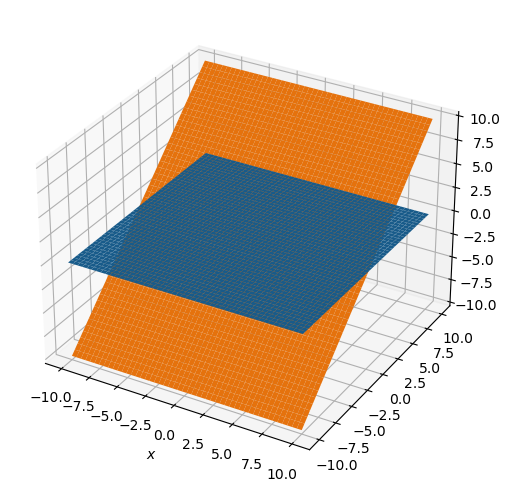

In [6]:
fig, axe = plt.subplots(subplot_kw={"projection": "3d"}, constrained_layout=True)

# reference plane (z values are always 0)
axe.plot_surface(xx, yy, np.zeros_like(xx))
axe.set_xlabel(r'$x$')

# rotated plane (z values are equal to y, we can use yy instead)
axe.plot_surface(xx, yy, zz)
axe.set_xlabel(r'$x$')

In [ ]:
def Tvalues(trans, phi, theta):
    """ Calculates the transmission value for any direction in polar
    coordinates using the equation (5) of Asimov et al. (2006) for a
    especific wavelength ignoring the sample thickness (i.e. =1).

    Parameters
    ----------
    trans : a tuple of size 3
        tuple containeing the transmission values along a-axis (Ta),
        b-axis (Tb), and c-axis (Tc). -> (Ta, Tb, Tc)
    phi : int or float between 0 and pi/2
        angle respect to the c-axis in radians
    theta : int or float between 0 and 2*pi
        angle respect to the a-axis in radians

    Returns
    -------
    numpy array
        the calculated T values for any given orientation
    """

    # extract Tx values
    Ta, Tb, Tc = trans
    
    return Ta * np.cos(theta)**2 * np.sin(phi)**2 + \
           Tb * np.sin(theta)**2 * np.sin(phi)**2 + \
           Tc * np.cos(phi)**2

def sph2cart(phi, theta, T):
    """ Convert from spherical/polar (phi, thetha) to cartesian
    coordinates.

    Parameters
    ----------
    phi : int or float between 0 and pi/2
        angle respect to the c-axis in radians
    theta : int or float between 0 and 2*pi
        angle respect to the a-axis  in radians
    T : int or float
        the magnitud of the vector (rho) in polar coordinates

    Returns
    -------
    numpy ndarrays (1d)
        three numpy 1d arrays with the x, y, and z coordinates
    """
    
    x = T * np.sin(phi) * np.cos(theta)
    y = T * np.sin(phi) * np.sin(theta)
    z = T * np.cos(phi)
    
    return np.around(x, decimals=6), np.around(y, decimals=6), np.around(z, decimals=6)


def find_intersection(normal, point):
    """
    Find the intersection between the surface generated by the
    function Tvalues and a plane defined by a normal vector
    and a point on the plane.

    Parameters:
    normal (array-like) :
        The normal vector of the plane.
    point (array-like) :
        A point on the plane.

    Returns : array-like
        An array of shape (3,) containing the x, y, and z
        coordinates of the intersection point.
    """
    pass


def generate_intersection_points(normal, point, x_range, y_range, step):
    """
    Generate points that belong to both the plane and the Tvalues surface.

    Parameters:
    normal (array-like) :
        The normal vector of the plane.
    point (array-like) :
        A point on the plane.
    x_range (tuple) :
        The range of x values to generate points over.
    y_range (tuple) :
        The range of y values to generate points over.
    step (float) :
        The step size to use when generating points.

    Returns (array-like) :
        An array of shape (n, 3) containing the x, y, and z
        coordinates of the intersection points.
    """
    pass